# Predict the Automobile Insurance claim

Here from the provided dataset we need to Predict the Automobile Insurance claim by using various models

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')


C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('insur_claim.csv')
data

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [3]:
#dataset columns

data.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
#data types of columns level

data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [5]:
#data info of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [6]:
#finding null values column level

data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
#finging unique values in the columns

data.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

# Univariate Plot

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64


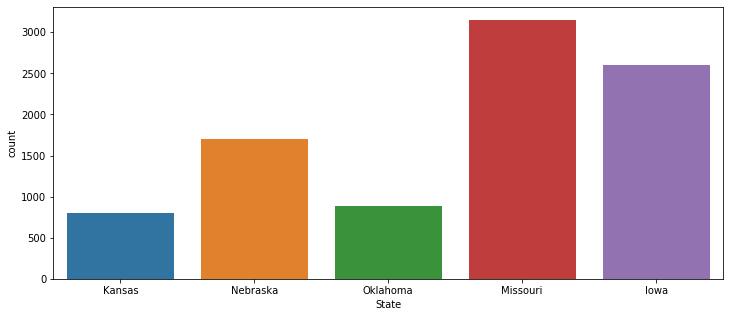

In [8]:
print(data['State'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['State'])

Most of the customer are from 

Missouri    3150,
Iowa        2601,
Nebraska    1703,
Oklahoma     882,
Kansas       798..

No     7826
Yes    1308
Name: Response, dtype: int64


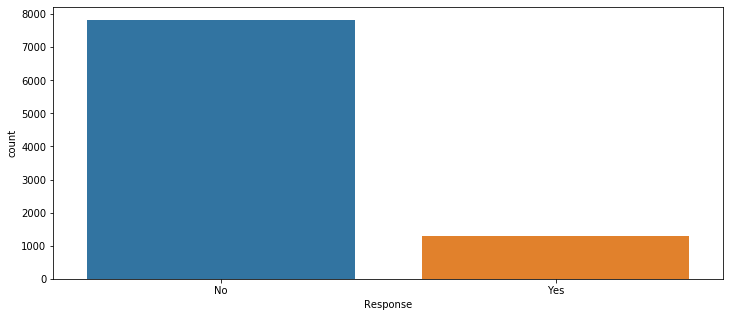

In [9]:
print(data['Response'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Response'])

Here only 1308 customer got "Yes" response

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


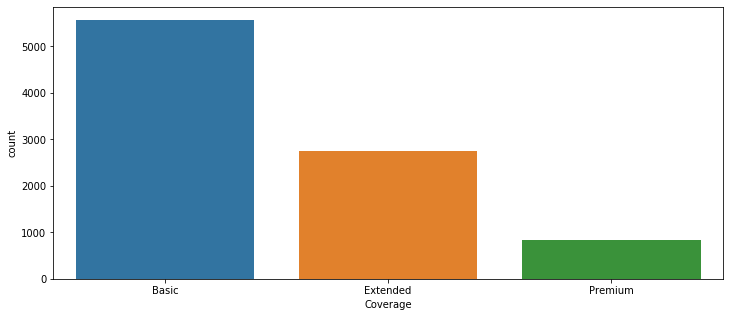

In [10]:
print(data['Coverage'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Coverage'])

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


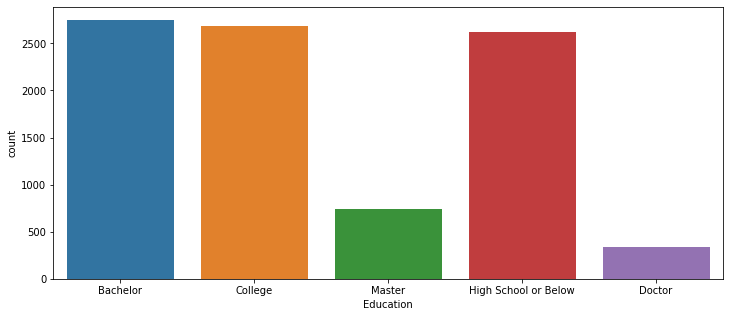

In [11]:
print(data['Education'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Education'])

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


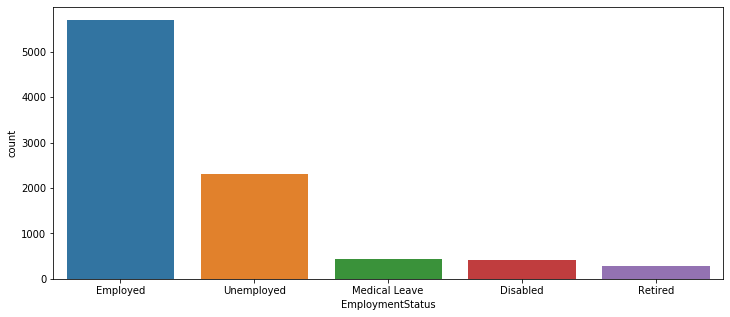

In [12]:
print(data['EmploymentStatus'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['EmploymentStatus'])

F    4658
M    4476
Name: Gender, dtype: int64


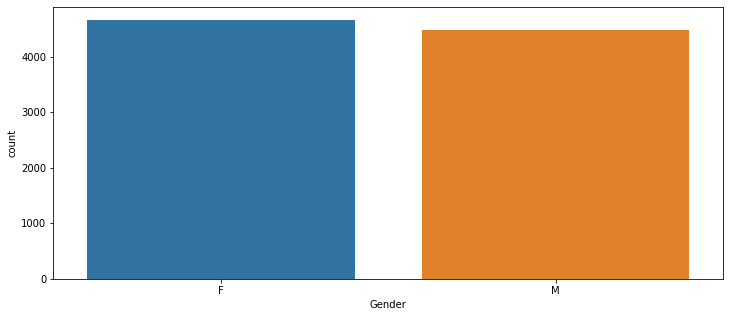

In [13]:
print(data['Gender'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Gender'])

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64


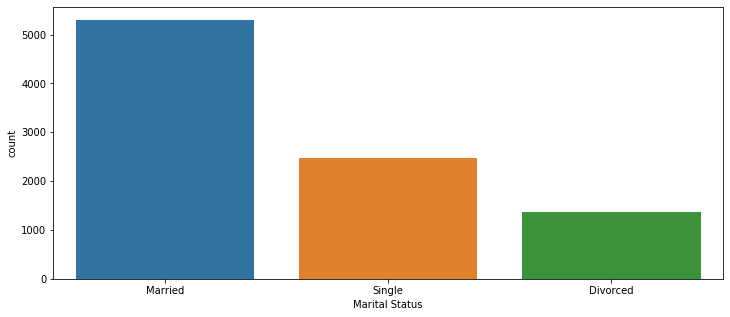

In [14]:
print(data['Marital Status'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Marital Status'])

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64


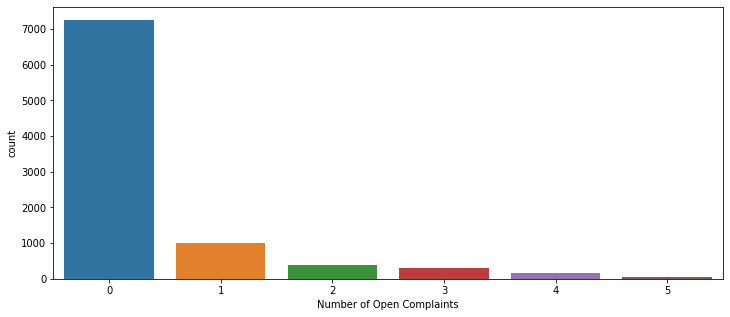

In [15]:
print(data['Number of Open Complaints'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Number of Open Complaints'])

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


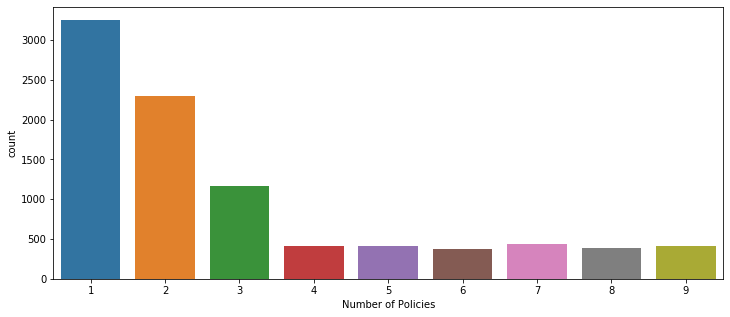

In [16]:
print(data['Number of Policies'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Number of Policies'])

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64


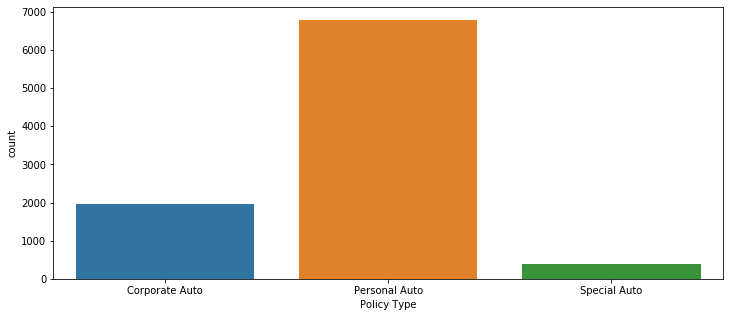

In [17]:
print(data['Policy Type'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Policy Type'])

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


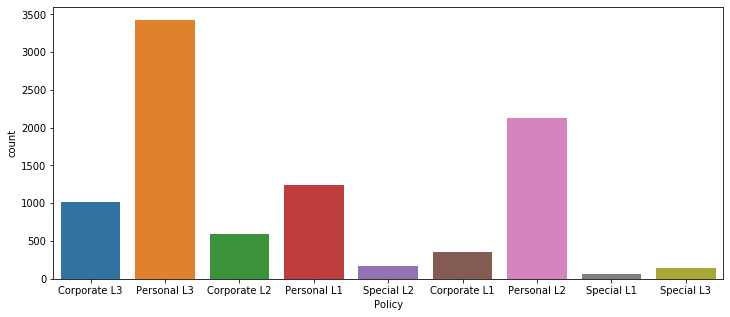

In [18]:
print(data['Policy'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Policy'])

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim Reason, dtype: int64


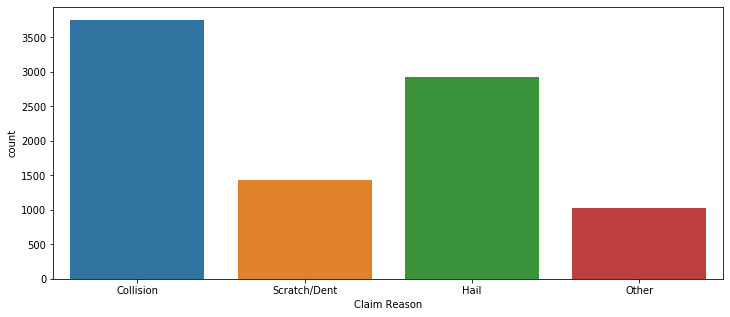

In [19]:
print(data['Claim Reason'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Claim Reason'])

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64


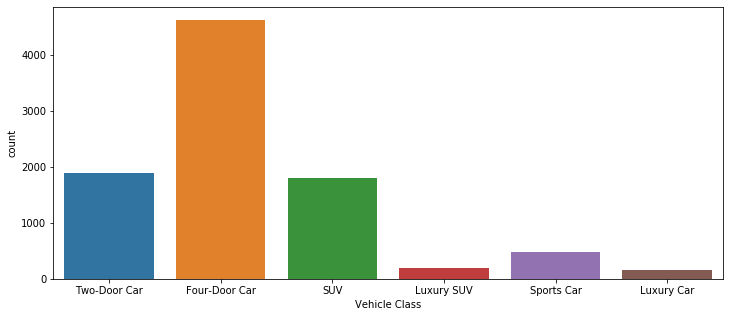

In [20]:
print(data['Vehicle Class'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Vehicle Class'])

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


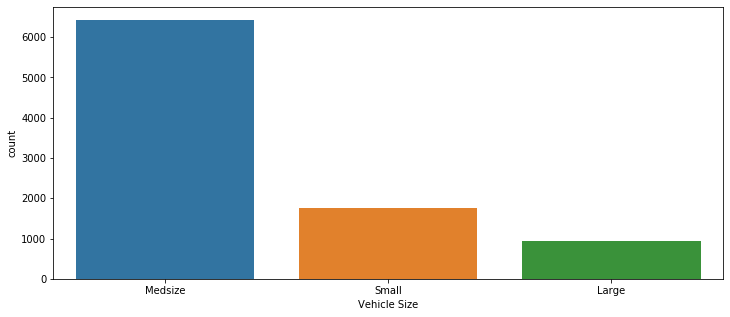

In [21]:
print(data['Vehicle Size'].value_counts())
plt.figure(figsize=(12,5))
sb.countplot(data['Vehicle Size'])

# Bivariate Plot

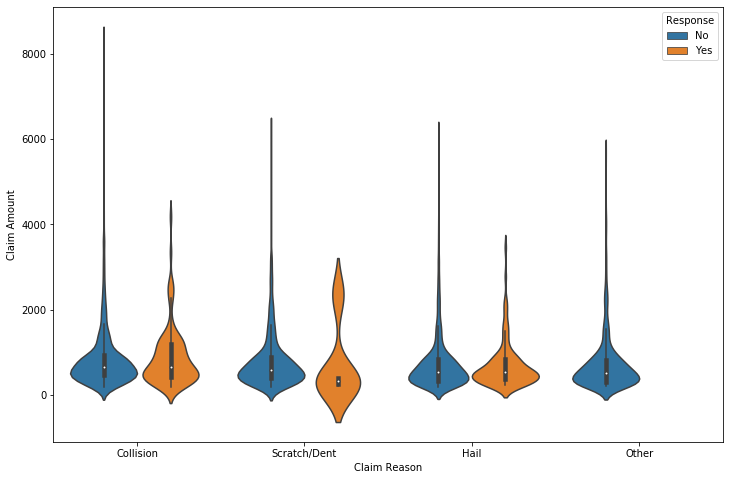

In [22]:
plt.figure(figsize=(12,8))
sb.violinplot(x='Claim Reason',y='Claim Amount',hue='Response',data=data)

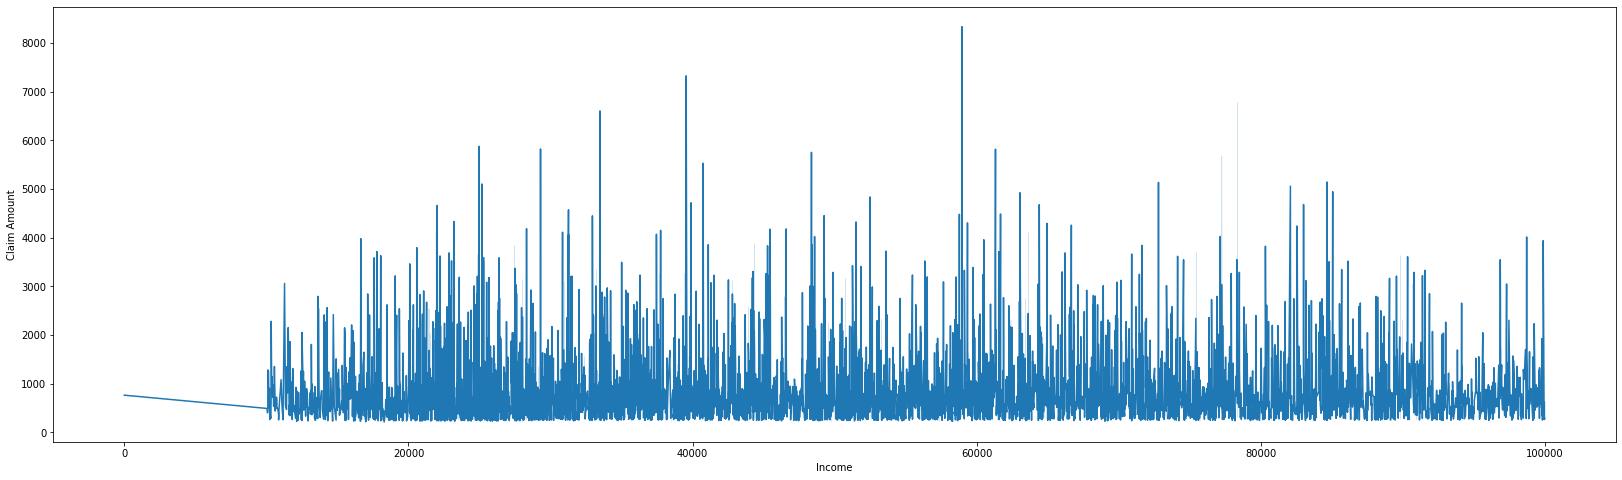

In [23]:
plt.figure(figsize=(28,8))
sb.lineplot(x='Income',y='Claim Amount',data=data)

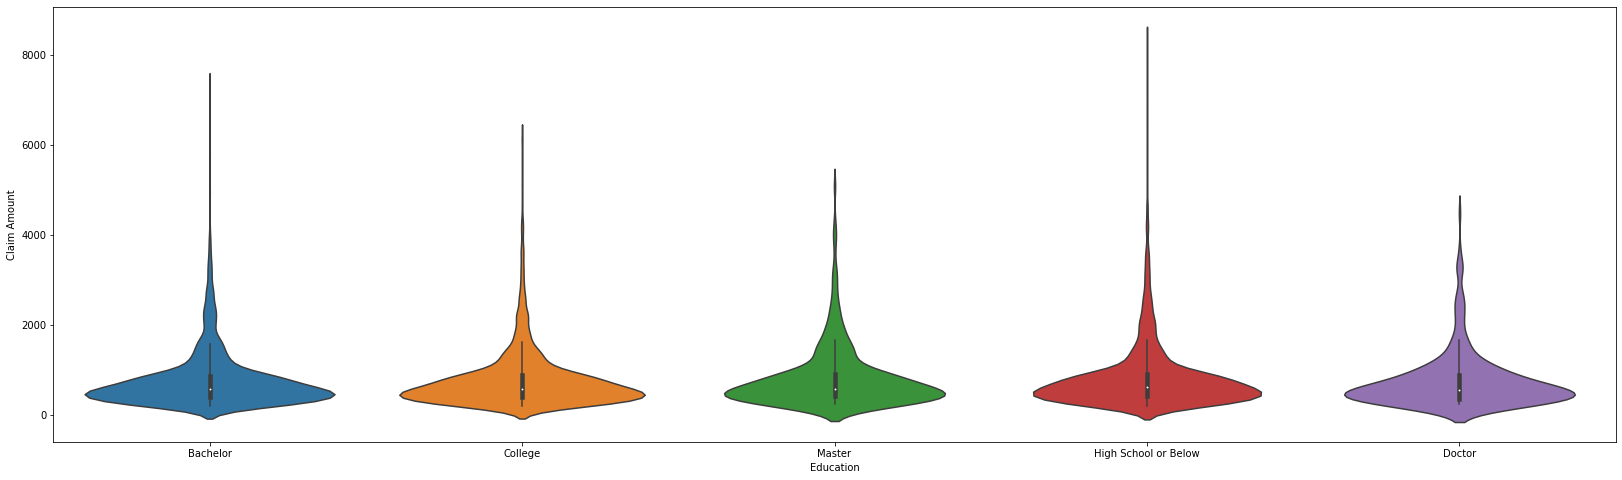

In [24]:
plt.figure(figsize=(28,8))
sb.violinplot(x='Education',y='Claim Amount',data=data)

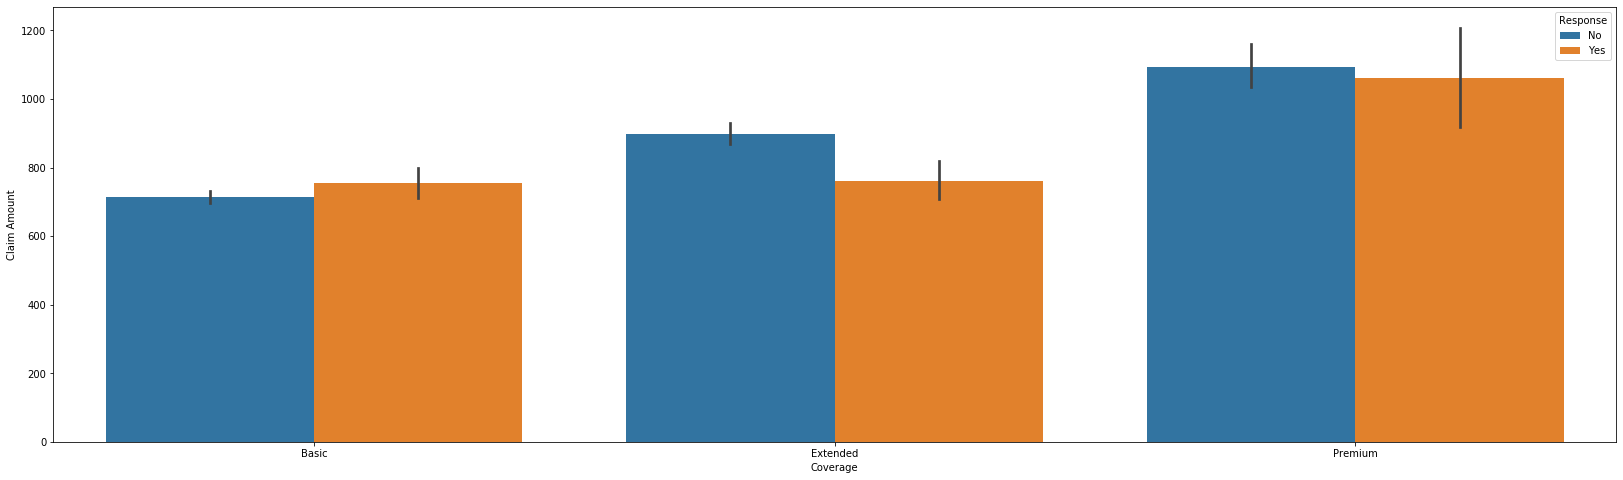

In [25]:
plt.figure(figsize=(28,8))
sb.barplot(x='Coverage',y='Claim Amount',hue='Response',data=data)

In [26]:
#To get the descriptive analysis 

data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Data Preprocessing

In [27]:
col=[ 'Country','State Code', 'State', 
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel',  'Vehicle Class', 'Vehicle Size']

In [28]:
#label encoding the above columns

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,0,1,1,276.351928,0,0,0,47,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,QZ44356,0,3,3,697.953590,0,1,0,24,4,...,42,0,8,1,5,3,0,1131.464935,0,1
2,AI49188,0,4,4,1288.743165,0,2,0,41,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,WW63253,0,2,2,764.586183,0,0,0,12,4,...,65,0,7,0,1,0,2,529.881344,3,1
4,HB64268,0,1,1,281.369258,0,0,0,52,1,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,0,2,2,2340.598798,0,0,0,32,1,...,89,0,2,1,3,1,3,198.234764,0,1
9130,PK87824,0,2,2,309.651122,1,1,1,34,1,...,28,0,1,0,2,0,1,379.200000,0,1
9131,TD14365,0,2,2,816.389043,0,1,0,55,4,...,37,3,2,0,1,0,1,790.784983,0,1
9132,UP19263,0,2,2,752.444244,0,1,1,52,1,...,3,0,3,1,4,3,1,691.200000,0,0


In [29]:
#data types by column 

data.dtypes

Customer                          object
Country                            int32
State Code                         int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class   

In [30]:
#droping the columns which are not useful in building a model

data1=data.drop(['Customer', 'Country', 'State Code', 'State', 'Effective To Date', 'Gender', 'Location Code',
       'Marital Status'],axis=1)

In [31]:
# the Correlation between the different variables

data1.corr()

,Claim Amount,Response,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Claim Amount,1.000000,-0.008930,0.168040,0.026038,-0.034846,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.020011,0.015217,-0.052004,-0.003941,0.226451,0.082307,0.017098
Response,-0.008930,1.000000,0.000642,0.000285,-0.016703,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.001110,-0.001461,-0.161332,-0.086607,0.016877,0.021225,-0.050691
Coverage,0.168040,0.000642,1.000000,0.021573,0.003239,-0.010646,0.458997,0.016925,0.010658,-0.007971,-0.013515,0.001469,-0.002317,-0.041627,-0.024638,0.279078,-0.017682,-0.003775
Education,0.026038,0.000285,0.021573,1.000000,-0.025271,0.018709,0.023952,0.003021,0.004140,-0.023270,0.007266,0.011650,0.011119,0.049994,-0.005018,0.020730,0.010192,-0.005491
EmploymentStatus,-0.034846,-0.016703,0.003239,-0.025271,1.000000,-0.726741,0.006269,0.008197,0.015376,0.007045,0.005035,-0.002240,-0.001159,-0.100479,-0.018346,0.330465,-0.002443,-0.011253
Income,0.024366,0.011932,-0.010646,0.018709,-0.726741,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.002080,0.005032,0.115622,0.013494,-0.355254,0.004343,0.007945
Monthly Premium Auto,0.396262,0.010966,0.458997,0.023952,0.006269,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,-0.001025,-0.001258,-0.058626,-0.011738,0.632017,0.169714,0.007768
Months Since Last Claim,0.011517,-0.016597,0.016925,0.003021,0.008197,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.017304,-0.013001,-0.014619,0.004432,0.007563,-0.001708,-0.004761
Months Since Policy Inception,0.009418,0.002952,0.010658,0.004140,0.015376,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,-0.004083,-0.006202,-0.070921,-0.004786,0.003335,0.002893,0.004923
Number of Open Complaints,-0.036343,-0.009881,-0.007971,-0.023270,0.007045,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,0.014447,0.019019,-0.028183,-0.007485,-0.014241,-0.016370,-0.005468


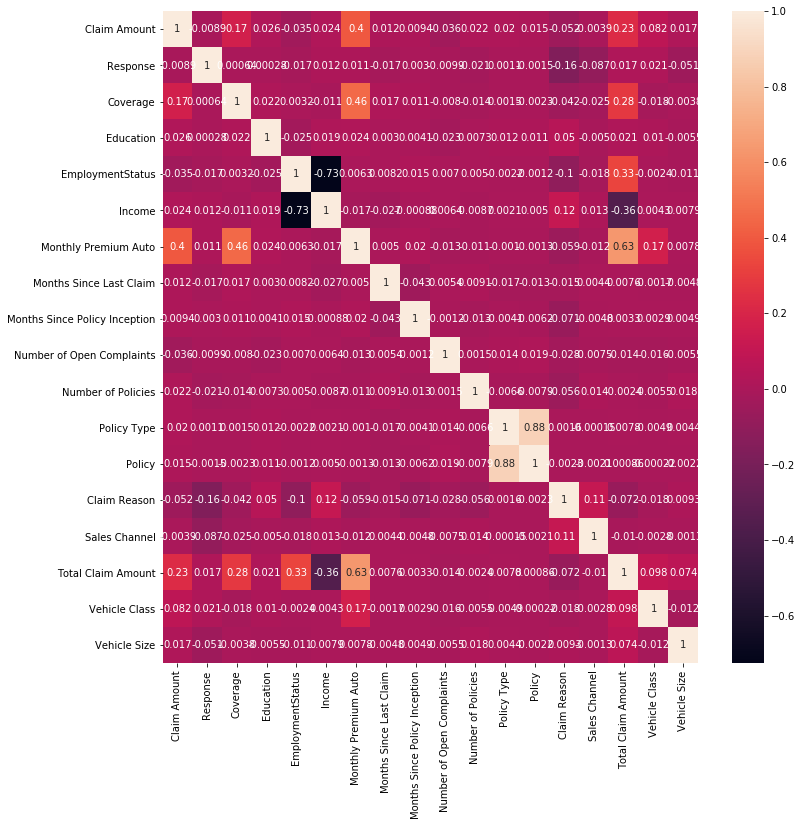

In [32]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,12))
sb.heatmap(data1.corr(),annot=True)

<Figure size 1440x2016 with 0 Axes>

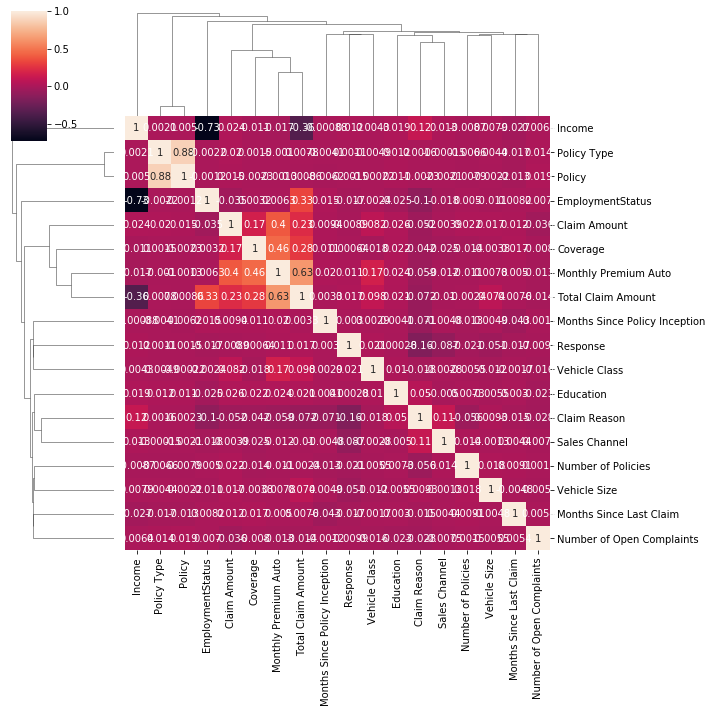

In [33]:
# This clustermap shows the Correlation between the different variables

plt.figure(figsize=(20,28))
sb.clustermap(data1.corr(),annot=True)

In [34]:
data1.dtypes

Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [35]:
#hot encoding of data 

data2 = pd.get_dummies(data=data1, columns=["Policy","Claim Reason", "Sales Channel", "Vehicle Class", "Vehicle Size"])
data2.head(3)

,Claim Amount,Response,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,...,Sales Channel_3,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Vehicle Class_5,Vehicle Size_0,Vehicle Size_1,Vehicle Size_2
0,276.351928,0,0,0,1,56274,69,32,5,0,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,1,0,4,0,94,13,42,0,...,0,1,0,0,0,0,0,0,1,0
2,1288.743165,0,2,0,1,48767,108,18,38,0,...,0,0,0,0,0,0,1,0,1,0



pairwise plot of relationship with the dataset

Multivariate plotting of dataset

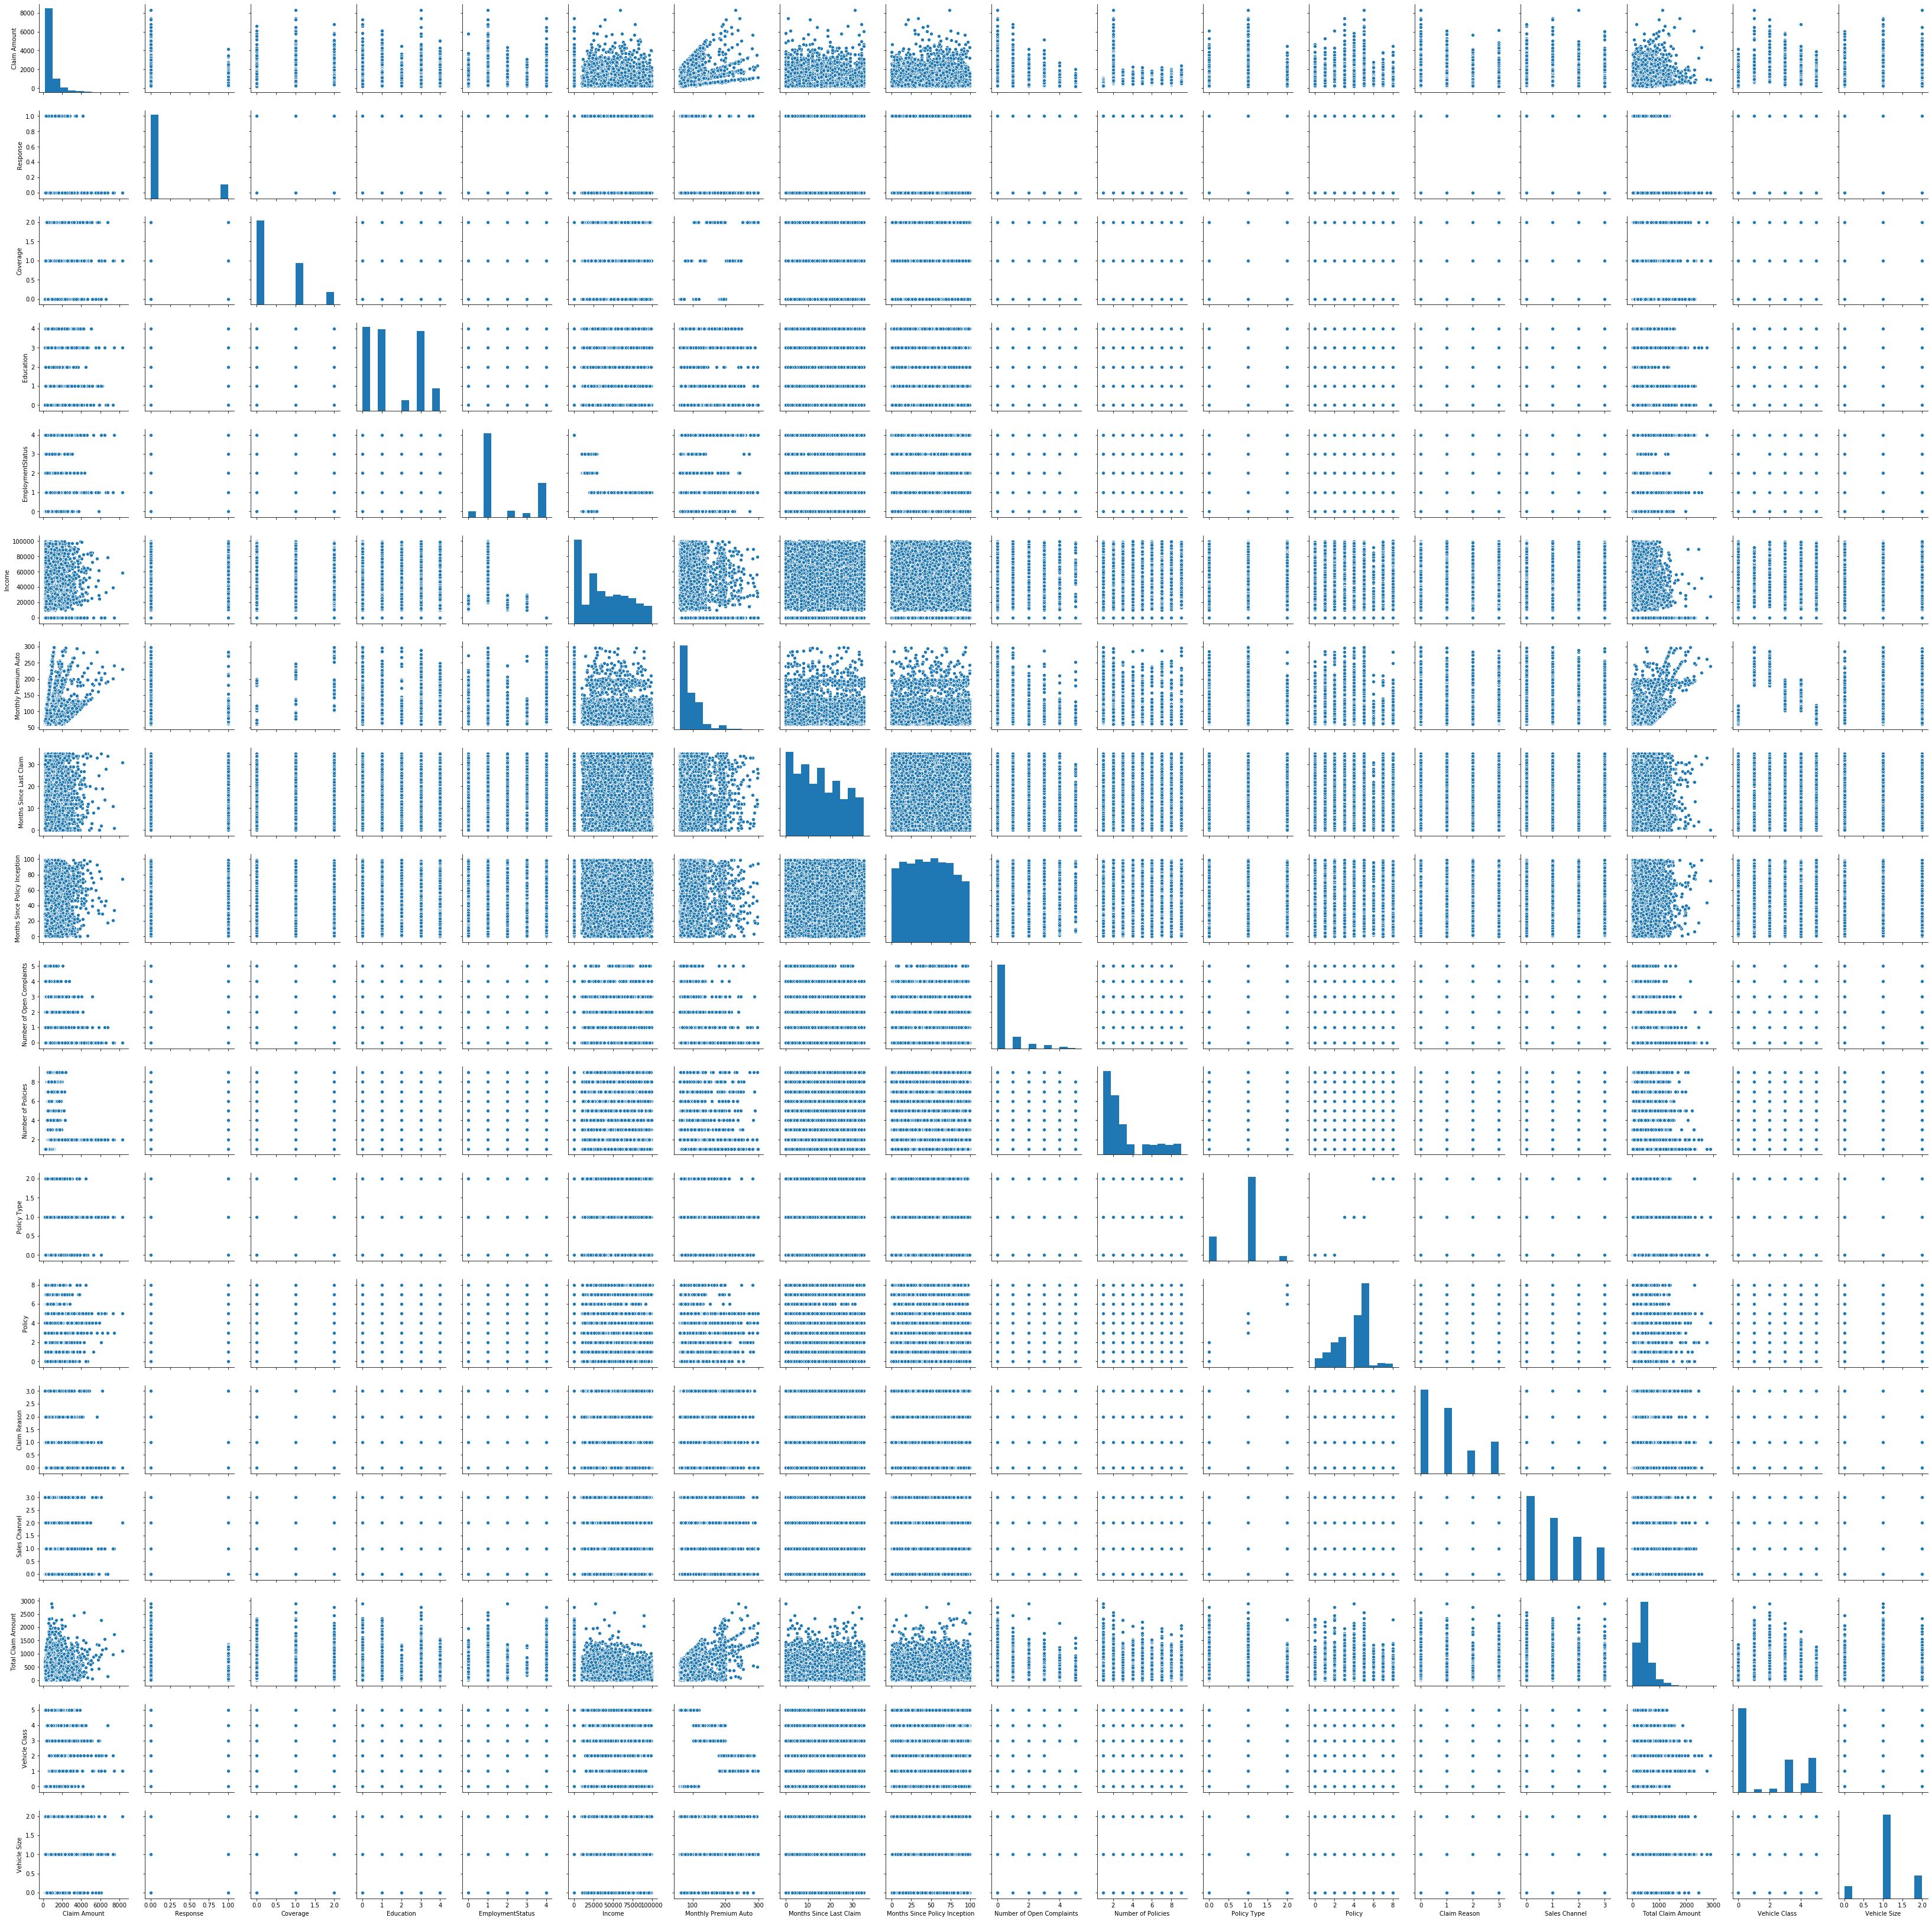

In [36]:
sb.pairplot(data1)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [37]:
x=data2.drop(['Claim Amount'],axis=1)
y=data2['Claim Amount']

In [38]:
print(x.shape)
print(y.shape)

(9134, 38)
(9134,)


We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [40]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [41]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square,r2 score on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))
print('r2 score :',metrics.r2_score(y_test, pred))

MAE : 146.35399665025415
MSE : 138635.1833913243
RMSE : 372.33745902248984

RMSLE: 0.2061929726413334
r2 score : 0.6915707385142849


cross valiadtion and prediction

In [42]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.6991684208187097
STD score: 0.007169858227360574

cross prediction [ 272.3353838   662.99533137 1551.30782079 ... 1728.31970014  725.34073015
  276.00773818]


In [43]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [44]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square,r2 score and rms_log_error on DecisionTreeRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))
print('r2 score :',metrics.r2_score(y_test, pred))

MAE : 185.9945350851122
MSE : 295343.6158469748
RMSE : 543.4552565271356

RMSLE: 0.2907952044469559
r2 score : 0.3429329330991191


In [45]:
#working on GradientBoostingRegressor 
#training and testing data using GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)

In [46]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on GradientBoostingRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))
print('r2 score :',metrics.r2_score(y_test, pred))

MAE : 170.80597163098932
MSE : 145692.65788858893
RMSE : 381.69707608074356

RMSLE: 0.2181024062629855
r2 score : 0.6758695896868523


cross valiadtion and prediction

In [47]:
#cross valiadtion
score=cross_val_score(gbr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(gbr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.6798388161095855
STD score: 0.01331591311632032

cross prediction [ 253.68673721  707.62702852 1860.89393634 ... 1311.61867557  806.11652663
  274.07799163]


# Grid Search


GridSearchCV for the best model

In [48]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Saving the model with joblib

In [49]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'insurance.pkl')

['insurance.pkl']

# Conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib